In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

In [18]:
df = pd.read_csv('./Data Formated/finance.csv', index_col=0)
df = df.groupby('Year').sum()

In [19]:
def plot(i1, i2):
    plt.figure(figsize=(16, 8))
    y1 = df[i1]
    y1 = y1 / y1.max()

    y2 = df[i2]
    y2 = y2 / y2.max()

    h = sns.lineplot(x=df.index.values, y=y1)
    h = sns.lineplot(x=df.index.values, y=y2)

    h.set_title(f"{i1} & {i2} ({np.round(y1.corr(y2), 2)})")

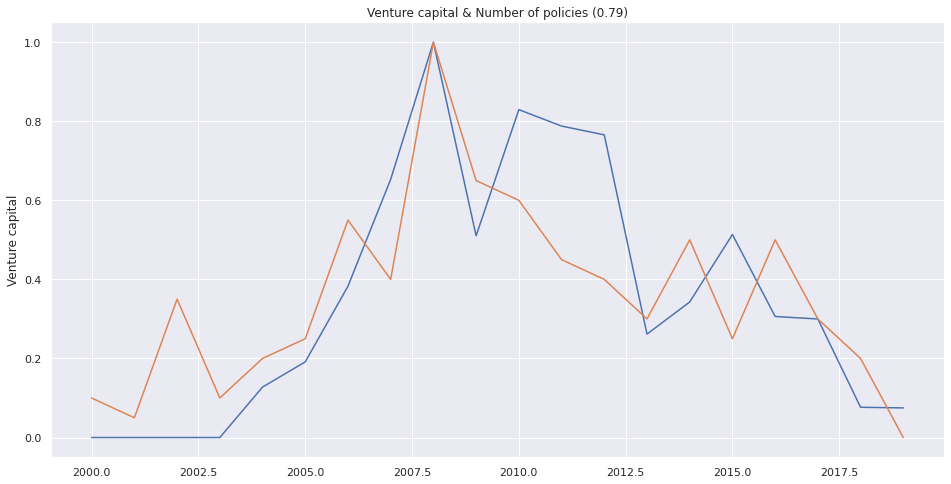

In [20]:
plot('Venture capital', 'Number of policies')

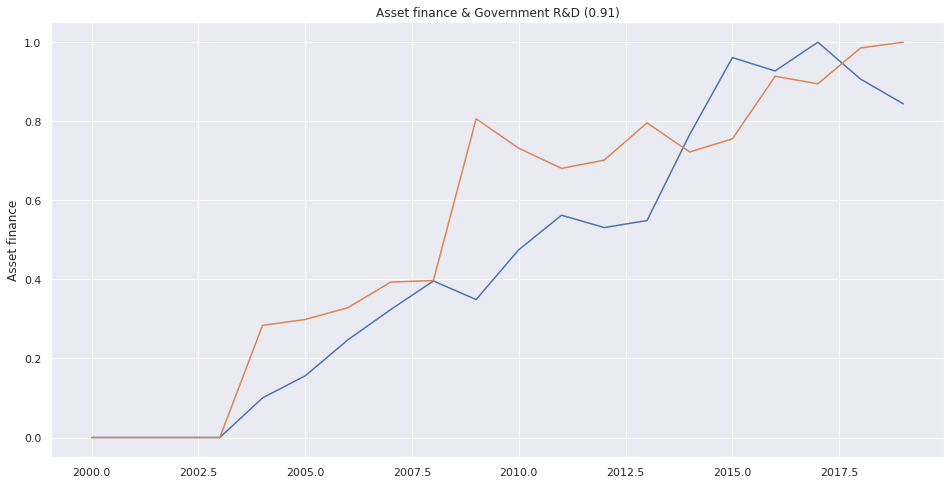

In [21]:
plot('Asset finance', 'Government R&D')

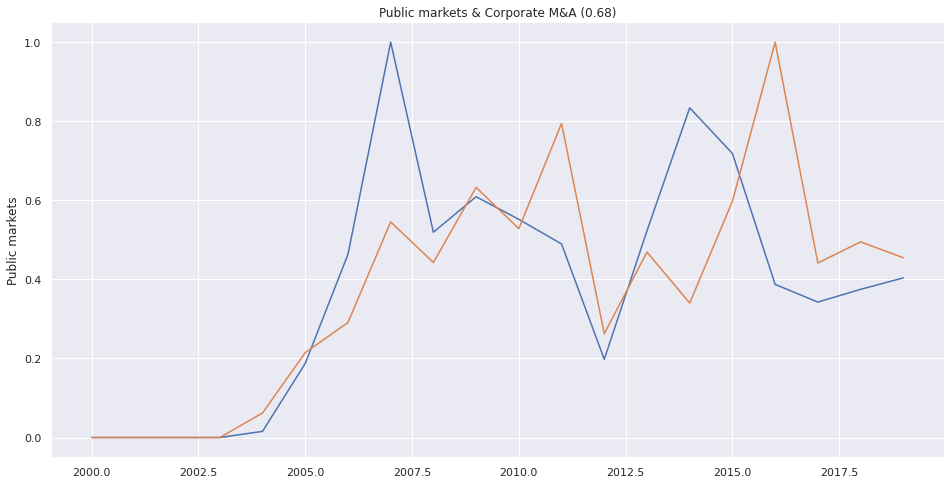

In [22]:
plot('Public markets', 'Corporate M&A')

[Text(0.5, 0, 'Government R&D'),
 Text(1.5, 0, 'Corporate R&D'),
 Text(2.5, 0, 'Venture capital'),
 Text(3.5, 0, 'Private equity expansion capital'),
 Text(4.5, 0, 'Public markets'),
 Text(5.5, 0, 'Asset finance'),
 Text(6.5, 0, 'Asset Finance minus Re-invested equity'),
 Text(7.5, 0, 'Small distributed capacity'),
 Text(8.5, 0, 'Private equity buy-outs'),
 Text(9.5, 0, 'Public markets investor exits'),
 Text(10.5, 0, 'Corporate M&A'),
 Text(11.5, 0, 'Project acquisition & refinancing'),
 Text(12.5, 0, 'Total: M&A/ buy-outs etc.'),
 Text(13.5, 0, 'NEX Returns'),
 Text(14.5, 0, 'Number of policies')]

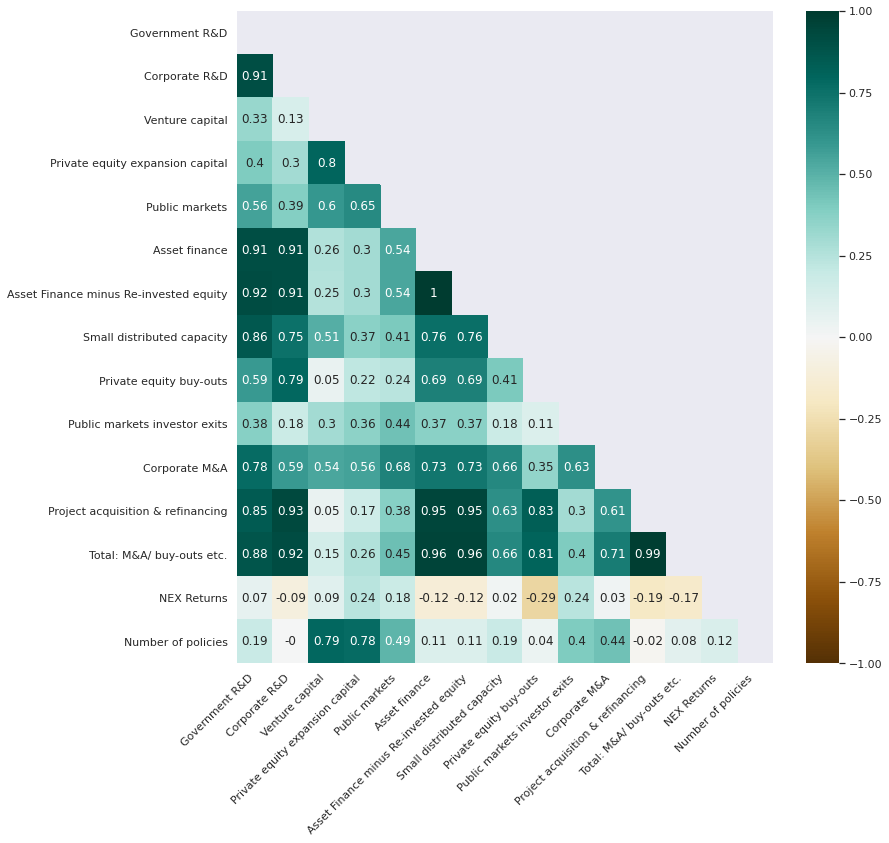

In [23]:
plt.figure(figsize=(12, 12))

corr = np.round(df.corr(), 2)
mask = np.triu(np.ones_like(corr, dtype=bool))

h = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
h.set_xticklabels(h.get_xticklabels(), rotation=45, ha='right')

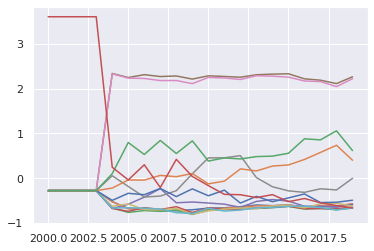

In [101]:
import scipy.stats as stats

# sns.lineplot(x=pd.date_range('2000', '2020', freq='Y'), y=stats.zscore(df))
x = pd.date_range('2000', '2020', freq='Y').year.values
Y = stats.zscore(df.drop('NEX Returns', axis=1).T)

for y in Y:
    sns.lineplot(x=x, y=y)

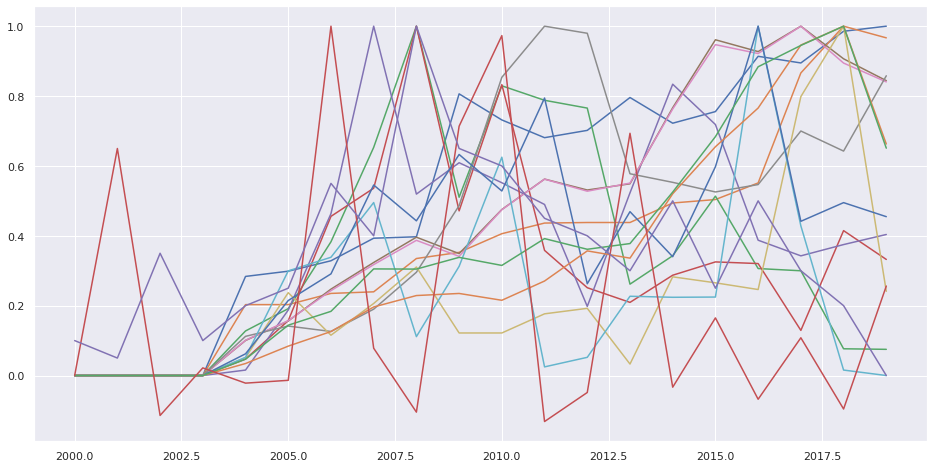

In [119]:
Y = df.apply(lambda x: x / x.max(), axis=0).values

plt.figure(figsize=(16, 8))
for y in Y.T:
    sns.lineplot(x=x, y=y)